In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import pathlib
import sisepuede.core.support_classes as sc
import sisepuede.manager.sisepuede_file_structure as sfs
import sisepuede.manager.sisepuede_models as sm
import sisepuede.utilities._toolbox as sf
import utils.common_data_needs as cdn
import warnings
warnings.filterwarnings("ignore")

plt.style.use("dark_background", )



/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/core/model_attributes.py:6684: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() 
                        to ensure that transition probability rows are enforced on a simplex.
                        
                        
                        FIX THIS ASAP TO DERIVE PROPERLY.
                        
                        
  warnings.warn(
/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/utilities/_toolbox.py:2551: UserWarning: Warning passed from optional_log: Successfully archived self.model_attributes to pickle at '/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2025-07-10T14;33;42.722643/sisepuede_run_2025-07-10T14;33;42.722643_model_attributes.pkl'.
  warnings.warn(f"Warning passed from optio

[juliapkg] Found dependencies: /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia/pyjuliapkg/juliapkg.json
[juliapkg] Found dependencies: /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia ^1.11.5
[juliapkg] Using Julia 1.11.5 at /Users/usuario/.julia/juliaup/julia-1.11.5+0.aarch64.apple.darwin14/bin/julia
[juliapkg] Using Julia project at /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.Registry.update()
           julia> Pkg.add([Pkg.PackageSpec(name="Cbc", uuid="9961bab8-2fa3-5c5a-9d89-47fab24efd76"), Pkg.PackageSpec(name="Clp", uuid="e2554f3b-3117-50c0-817c-e040a3ddf72d"), Pkg.PackageSpec(name="DataFrames", uuid="a93c6f00-e57d-5684-b7b6-d8193f3e46c0"), Pkg.PackageSpec(name="GLPK"

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed MathOptInterface ─ v1.42.0
    Updating `/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia/Project.toml`
  [9961bab8] + Cbc v1.2.0
  [e2554f3b] + Clp v1.2.2
  [a93c6f00] + DataFrames v1.7.0
  [60bf3e95] + GLPK v1.2.1
  [87dc4568] + HiGHS v1.18.1
  [b6b21f68] + Ipopt v1.10.6
  [4076af6c] + JuMP v1.26.0
  [a3c327a0] + NemoMod v2.0.0 `https://github.com/sei-international/NemoMod.jl.git#61e63e0`
⌅ [6099a3de] + PythonCall v0.9.22
  [0aa819cd] + SQLite v1.6.1
    Updating `/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
  [9961bab8] + Cbc v1.2.0
  [e2554f3b] + Clp v1.2.2
  [523fee87] + CodecBzip2 v0.8.5
  [944b1d66] + CodecZlib v0.7.8
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [88353bc9] + ConfParser v0.1.2
  [a8cc5b0e] 

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   1236.9 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/utilities/_toolbox.py:2551: UserWarning: Warning passed from optional_log: Successfully initialized JuMP optimizer from solver module HiGHS..
  warnings.warn(f"Warning passed from optional_log: {msg}.")


# Initialize some SISEPUEDE components

In [7]:
dict_ssp = cdn._setup_sisepuede_elements()

matt = dict_ssp.get("model_attributes", )
models = dict_ssp.get("models", )
regions = dict_ssp.get("regions", )
time_periods = dict_ssp.get("time_periods", )

# setup region
_REGION_NAME = "uganda"
_REGION_ISO = regions.return_region_or_iso(_REGION_NAME, return_type = "iso")

# base dataset
df_uganda = cdn.get_raw_ssp_inputs()


##  SOME GLOBALS

_FIELD_DEMAND_CRUDE_KBD = "demand_fuel_crude_kbd"           # thousand barrels per day
_FIELD_PRODUCTION_CRUDE_KBD = "production_fuel_crude_kbd"   # thousand barrels per day
_FIELD_PRODUCTION_CRUDE_PJA = "production_fuel_crude_pja"   # pj/year

# year to estimate out to
_YEAR_TARGET = 2100



In [9]:
# build a dataframe with the universe of years
df_space_years = pd.DataFrame(
    {
        time_periods.field_year: range(2015, _YEAR_TARGET + 1),
    }
)


# Load data we'll work with

- The [2023 Uganda/IEA Energy Transition Plan](https://www.iea.org/reports/uganda-energy-transition-plan) describes average annual production of Crude oilby decade in the Albertine Graben with estimates for total crude production  


##  1. Crude Oil Exports and Import Fractions

- Figure 2.26 shows estimates of production and oil demands
- We combine these two to estimate the fraction of oil imported and total exports
- Note that [IEA](https://www.iea.org/countries/uganda/oil) doesn't show any crude oil production in Uganda in 2025, so we estimate start date as 2026 (and 2026 will be 0 for interpolation)

  
![Crude Oil Production](./input_data/iea_etp/crude_oil_production_projection.png)

### First, build estimates of values shown in figure 2.26
- Beyond 2050, use projection

In [10]:

# these are taken from visual estimates
df_demand_crude = pd.DataFrame(
    {
        time_periods.field_year: [2021, 2030, 2040, 2050,],
        _FIELD_DEMAND_CRUDE_KBD: [45, 105, 145, 125, ]
    }
)

df_production_crude = pd.DataFrame(
    {
        time_periods.field_year: [2026, 2030, 2040, 2050],
        _FIELD_PRODUCTION_CRUDE_KBD: [0, 220, 126, 65] 
    }
)

In [11]:
##  PROJECT CRUDE (just to have something beyond 2050)


arr = df_production_crude[[_FIELD_PRODUCTION_CRUDE_KBD]].to_numpy().copy()
year_0 = df_production_crude[time_periods.field_year].max()
delta_y = 10
max_lookback_project = 3
n_proj = int((_YEAR_TARGET - year_0)/delta_y)

# lists that will be updated
years = []
vec_new = []

# iteratively apply a constrained lookback regression
for i in range(n_proj):
    val_new = sf.project_from_array(
        arr,
        max_deviation_from_mean = 1.0,
        max_lookback = max_lookback_project,
    )

    val_new[0] = max(val_new[0], arr[-1, 0]/2)
    arr = np.concatenate([arr, np.array([val_new])])

    
    vec_new.append(val_new[0])
    years.append(year_0 + (i + 1)*delta_y)

# projection df
df_production_crude_proj = pd.DataFrame(
    {
        time_periods.field_year: years,
        _FIELD_PRODUCTION_CRUDE_KBD: vec_new,
    }
)

df_production_crude_proj

,year,production_fuel_crude_kbd
0,2060,32.50000
1,2070,16.25000
2,2080,8.12500
3,2090,4.06250
4,2100,2.03125


<Axes: xlabel='year', ylabel='Production of oil in kbl/day'>

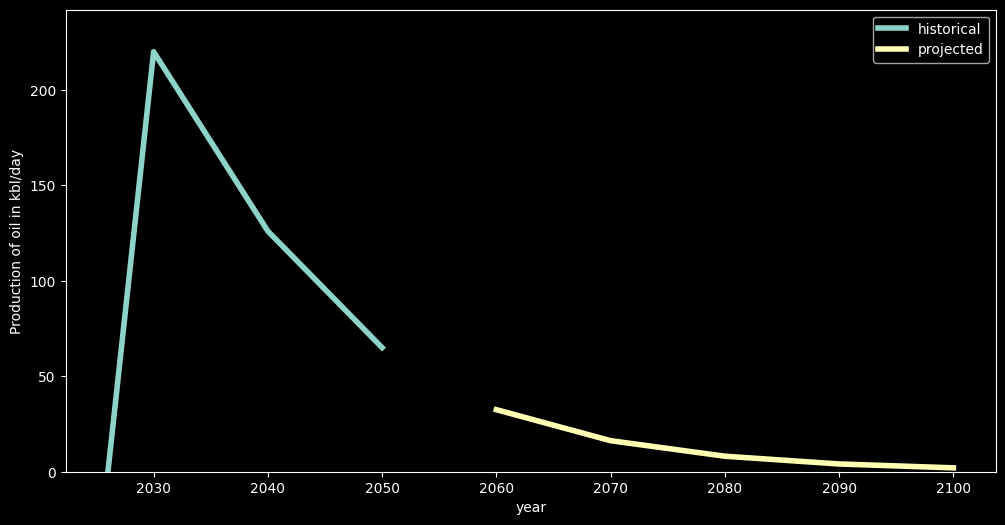

In [12]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_ylabel("Production of oil in kbl/day")
ax.set_ylim(0, df_production_crude[_FIELD_PRODUCTION_CRUDE_KBD].max()*1.1)

(
    df_production_crude
    .rename(
        columns = {_FIELD_PRODUCTION_CRUDE_KBD: "historical", },
    )
    .plot(
        x = time_periods.field_year, 
        ax = ax, 
        linewidth = 4, 
    )
)

(
    df_production_crude_proj
    .rename(
        columns = {_FIELD_PRODUCTION_CRUDE_KBD: "projected", },
    )
    .plot(
        x = time_periods.field_year, 
        ax = ax, 
        linewidth = 4, 
    )
)



<Axes: xlabel='year', ylabel='Production of oil in kbl/day'>

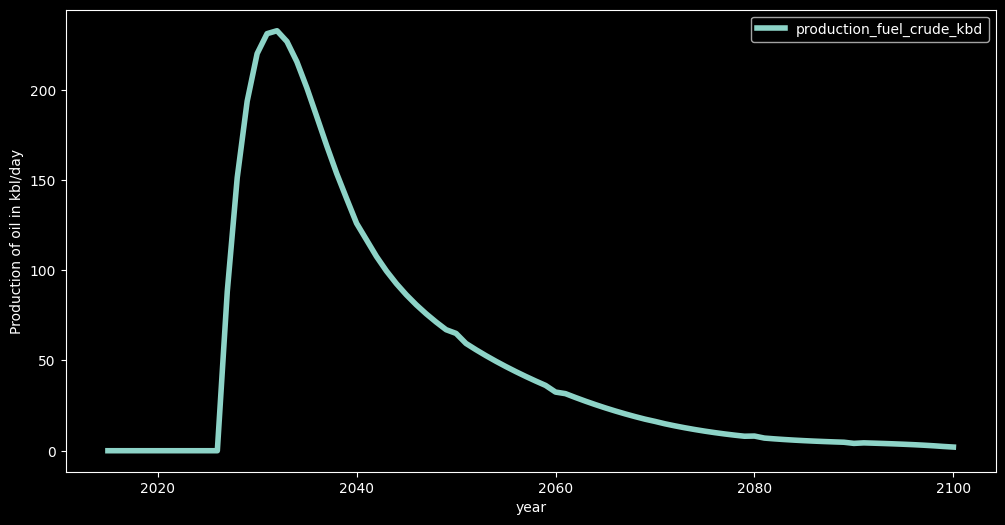

In [13]:
df_production_crude_full = (
    pd.merge(
        df_space_years,
        pd.concat([df_production_crude, df_production_crude_proj], axis = 0, ),
        how = "left",
    )
    .interpolate("spline", order = 4, )
    .bfill()
)

fig, ax = plt.subplots(figsize = (12, 6))
ax.set_ylabel("Production of oil in kbl/day")
df_production_crude_full.plot(
    ax = ax,
    linewidth = 4,
    x = time_periods.field_year, 
)

##  Note, Box 2.3 says 1.7 billion barrels are accessible

- **Box 2.**: _The Albertine Graben is a 500 km long the rift valley in the Western Region of
Uganda and neighbouring Democratic Republic of Congo. Oil deposits in the
region around Lake Albert were first discovered in 2006, with total oil in place
reserves estimated at 6.5 billion barrels, of which 1.7 billion barrels are deemed
recoverable_
- The estimate above gets close to this, with a total of 1.56 billion barrels produced from 2026 to 2100

In [15]:
total_prod = df_production_crude_full[_FIELD_PRODUCTION_CRUDE_KBD].sum()*365*1000
est = np.round(total_prod/10**9, decimals = 3)

df = df_production_crude_full[r
    df_production_crude_full[_FIELD_PRODUCTION_CRUDE_KBD] > 0
]
y0 = df[time_periods.field_year].min()
y1 = df[time_periods.field_year].max()
print(f"Estimate of total production from {y0} - {y1}: {est} billion barrels")

Estimate of total production from 2027 - 2100: 1.563 billion barrels


##  Get some conversion factors

In [50]:
modvar_exports = matt.get_variable(models.model_enercons.modvar_enfu_exports_fuel)
modvar_volumetric = matt.get_variable(models.model_enercons.modvar_enfu_energy_density_volumetric)


field_ved = modvar_volumetric.build_fields(category_restrictions = "fuel_crude")

# unit managers
um_energy = matt.get_unit("energy")
um_volume = matt.get_unit("volume")

# units of volume for volumetric energy density
units_volume_ved = modvar_volumetric.attribute("unit_volume")
scale_factor_volume = 1000*um_volume.convert("barrel", units_volume_ved)

scale_factor_energy = um_energy.convert(
    modvar_volumetric.attribute("unit_energy"), 
    modvar_exports.attribute("unit_energy"),
)

# energy contained in 1000 barrels of oil in PJ
energy_pj_per_kb = df_uganda[field_ved].iloc[0]*scale_factor_volume*scale_factor_energy


###  Convert kb/d to pj/year

In [76]:
# for production
vec_days_per_year = np.array([
    365 + int(x%4 == 0)
    for x in list(df_production_crude_full[time_periods.field_year])
])

vec_production_crude_pja = vec_days_per_year*energy_pj_per_kb*df_production_crude_full[_FIELD_PRODUCTION_CRUDE_KBD].to_numpy()
df_production_crude_full[_FIELD_PRODUCTION_CRUDE_PJA] = vec_production_crude_pja


# for demand




##  1. Petroleum Product Import Fractions

- Figure 2.26 shows estimates of production and oil demands
- We combine these two to estimate the fraction of oil imported and total exports
  
![Petroleum Product Import Fractions](./input_data/iea_etp/petroleum_product_demands_over_time.png)

# Export

In [751]:
df_piv.to_csv(
    cdn._PATH_OUTPUTS.joinpath(f"{modvar_pop.name.upper()}.csv"),
    encoding = "UTF-8",
    index = None, 
)